In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels
import sys
np.set_printoptions(threshold=sys.maxsize)

# Read Data
## Befor Do Anything We Must Know The Data And What's The Problem or Anything That You Must Solve It

## Problem : We Must Detect Presence or absence of cardiovascular disease

### 1) Undrestand The Type Of Data
### 2) Undrestand The Null Value
### 3) Clean Data
### 4) Underestand The Corr Between Columns
 

In [ ]:
df = pd.read_csv('../input/cardiovascular-disease-dataset/cardio_train.csv')
df.head()

### CSV : That Mean Comma Seperate Value As You Can See Above The Seperetor Is (;) For This Priblem Do Code Below

In [ ]:
df = pd.read_csv('../input/cardiovascular-disease-dataset/cardio_train.csv', sep=';')
df.head()

### The Description Of Every Column :

### Age | Objective Feature | age | int (days)
### Height | Objective Feature | height | int (cm) |
### Weight | Objective Feature | weight | float (kg) |
### Gender | Objective Feature | gender | categorical code |
### Systolic blood pressure | Examination Feature | ap_hi | int |
معمولا فشارخون سیستولیک (عدد اول)، به عنوان یک علامت هشداردهنده بیماری‌های قلبی و عروقی در افراد بالای پنجاه سال بیشتر مورد توجه است. در اغلب افراد، فشارخون سیستولیک با بالا رفتن سن افزایش پیدا می‌کند
### Diastolic blood pressure | Examination Feature | ap_lo | int |
فشار خون دیاستولیک همان عدد دوم یا عدد پایین در اندازه‌گیری فشار خون است. این عدد نشان‌دهنده حداقل فشاری است که 
خون شما به دیواره شریان‌ها (سرخرگ‌ها) هنگام استراحت قلب وارد می‌کند
### Cholesterol | Examination Feature | cholesterol | 1: normal, 2: above normal, 3: well above normal |
### Glucose | Examination Feature | gluc | 1: normal, 2: above normal, 3: well above normal |
### Smoking | Subjective Feature | smoke | binary |
### Alcohol intake | Subjective Feature | alco | binary |
### Physical activity | Subjective Feature | active | binary |
### Presence or absence of cardiovascular disease | Target Variable | cardio | binary |


In [ ]:
df.info()
# No Null Value In Observation 

In [ ]:
df1 = df.drop('id', axis=1)

### age is days divide to 365 

In [ ]:
df1['age'] = round(df1['age'] / 365)

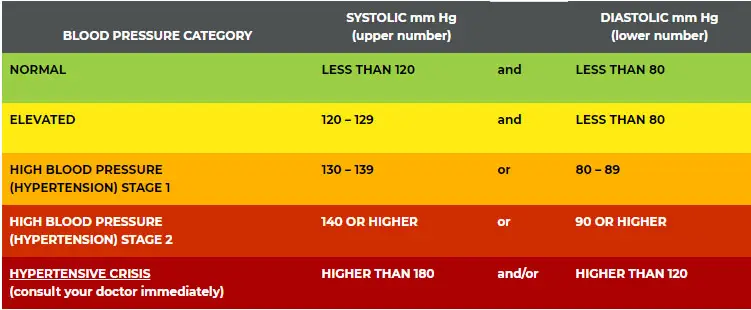

#### let's Undrestand Anyone Has HyperTensive crisis
#### I hope We Don't have Anyone

**We Don't Have Null Value But We Have Unbeleiveble Values** 

In [ ]:
df1[(df1['ap_hi'] > 180 ) | (df1['ap_lo'] > 120)]

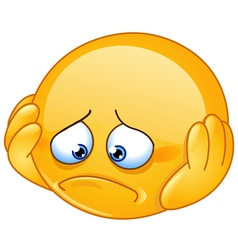
### Our ap_lo Columns it Does Not Have True Value's becauce 1000 or 800 
### let's Solve This problem

### Look At The Describe min is -70 Whatttttt Or 11000 ? :| 


In [ ]:
df1['ap_lo'].describe()

In [ ]:
df1['ap_hi'].describe()

### Because We Have Age More Than 30 The ap_lo Values Must Above 76 And ap_hi Be 108

In [ ]:
df1['ap_lo']  = df1['ap_lo'].apply(lambda x: (np.nan if x <= 76 else x))
df1['ap_lo']  = df1['ap_lo'].apply(lambda x: (np.nan if x >= 130 else x))

In [ ]:
df1['ap_lo'].describe()

In [ ]:
df1['ap_hi']  = df1['ap_hi'].apply(lambda x: (np.nan if x <= 108 else x))
df1['ap_hi']  = df1['ap_hi'].apply(lambda x: (np.nan if x >= 200 else x))

In [ ]:
df1['ap_hi'].describe()

In [ ]:
df1

In [ ]:
plt.figure(figsize=(20, 12))
sns.barplot(df1['age'], df1['active'],hue=df1['gender'])

In [ ]:
print('1 - women CM')
print(df1[df1['gender'] == 1]['height'].describe())
print('----------------------------------------------------------------------------------------')
print('2 - men CM')
print(df1[df1['gender'] == 2]['height'].describe())

In [ ]:
print('1 - women Kg')
print(df1[df1['gender'] == 1]['weight'].describe())
print('----------------------------------------------------------------------------------------')
print('2 - men Kg')
print(df1[df1['gender'] == 2]['weight'].describe())

In [ ]:
plt.figure(figsize=(20, 12))
sns.set_theme(style="whitegrid")
sns.boxplot(x=df1[df1['gender'] == 1]['height'],  orient='H')

#df1[df1['gender'] == 1]['height'].plot(kind='box', figsize=(20, 12))

In [ ]:
plt.figure(figsize=(20, 12))
sns.set_theme(style="whitegrid")
sns.boxplot(x=df1[df1['gender'] == 1]['weight'],  orient='H')

In [ ]:
plt.figure(figsize=(20, 12))
sns.set_theme(style="whitegrid")
sns.boxplot(x=df1[df1['gender'] == 2]['height'],  orient='H')


In [ ]:
plt.figure(figsize=(20, 12))
sns.set_theme(style="whitegrid")
sns.boxplot(x=df1[df1['gender'] == 2]['weight'],  orient='H')


#### Now Let's Clean The Height And Weight For Both Men And Women :

#### We Do This For Easy If You Don't Like It Try Another Way

In [ ]:
df1_women = df1[(df1['gender'] == 2)]
df1_men = df1[(df1['gender'] == 1)]

In [ ]:
#Clean Height For Both: 
df1_women['height'] = df1_women['height'].apply(lambda x: (np.nan if x < 150 else x))
df1_women['height'] = df1_women['height'].apply(lambda x: (np.nan if x > 181 else x))

df1_men['height'] = df1_men['height'].apply(lambda x: (np.nan if x < 155 else x))
df1_men['height'] = df1_men['height'].apply(lambda x: (np.nan if x > 190 else x))


In [ ]:
#Clean Weight For Both: 
df1_women['weight'] = df1_women['weight'].apply(lambda x: (np.nan if x < 63 else x))
df1_women['weight'] = df1_women['weight'].apply(lambda x: (np.nan if x > 94 else x))

df1_men['weight'] = df1_men['weight'].apply(lambda x: (np.nan if x < 54 else x))
df1_men['weight'] = df1_men['weight'].apply(lambda x: (np.nan if x > 110 else x))


In [ ]:
df2 = df1_men.append(df1_women)
df2 = df2.sample(frac = 1) 
df2.info()

### Now We Have Null value 
### We Can Use mean or KNN for Null value 
### In This case We use imputer KNN
### Befor That We Seperate Feature And Target 

In [ ]:
x = df2.iloc[:, :-1]
y = df2.iloc[:, -1]

In [ ]:
x['cholesterol'].value_counts()
#1: normal, 2: above normal, 3: well above normal |

In [ ]:
x['gluc'].value_counts()
# 1: normal, 2: above normal, 3: well above normal

In [ ]:
x['gender'].value_counts()
# 1 - women, 2 - men

In [ ]:
df2.pivot_table(index='gender', columns='cardio',values='weight' , aggfunc='count').plot(kind='bar')

In [ ]:
x.info()

In [ ]:
x.describe().T

In [ ]:
x.columns

In [ ]:
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=3)
x1 = imputer.fit_transform(x)
x1 = pd.DataFrame(x1, columns=x.columns)
x1.head()

In [ ]:
sns.catplot(x='gender', y='age',

                hue='smoke',col='cholesterol',

                data=x1, kind="box",

                height=4, aspect=.7);

In [ ]:
sns.pairplot(x1)

In [ ]:
plt.figure(figsize=(20, 12))
sns.heatmap(x1.corr(), annot=True)

In [ ]:
x1.info()

In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import MinMaxScaler
ct = ColumnTransformer(transformers=[('cat', MinMaxScaler(), [0, 2, 3, 4, 5])] ,remainder='passthrough', n_jobs=-1)
x2 = ct.fit_transform(x1)

In [ ]:
x2 = pd.DataFrame(x2, columns=x.columns)
x2.head()

In [ ]:
x2.iloc[:, 5:11] = x2.iloc[:, 5:11].astype('object')
x3 = pd.get_dummies(x2)

In [ ]:
x3

In [ ]:
from sklearn.preprocessing import OneHotEncoder
#{
#On All Data
#enc = OneHotEncoder()
#enc.fit(x2)  
#x3 = enc.transform(x2).toarray()
#}
#ct_categorical = ColumnTransformer(transformers=[('cat', OneHotEncoder(), [1, 6, 7, 8, 9, 10])] ,remainder='passthrough', n_jobs=-1)
#x3 = ct_categorical.fit_transform(x2)

In [ ]:
x3.shape

In [ ]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

x_train, x_test, y_train, y_test = train_test_split(x3, y, test_size=0.3, random_state=1)

In [ ]:
## It's Take Too Long Time
#parameters = {'max_depth':[3,4,5,6,7,8], 'n_estimators':[1000, 1200, 1400, 1600, 1800], 'criterion':('gini', 'entropy')}
#rn = RandomForestClassifier()
#clf = GridSearchCV(rn , parameters)
#clf.fit(x_train, y_train)
#predict_cv = clf.predict(x_test)
#print(accuracy_score(y_test, predict_cv))

In [ ]:
#Without Using GridSearchCV: 
rn = RandomForestClassifier(max_depth=5, n_estimators=1700, n_jobs=-1, criterion='entropy')
rn.fit(x_train, y_train)
print(rn.score(x_train, y_train))
predict = rn.predict(x_test)
print(accuracy_score(y_test, predict))